Uploading data using pandas read_csv method

In [53]:
import pandas as pd  # 
import numpy as np
df=pd.read_csv('Coursework_1_data.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Exploratory Data Analysis 

###1) by using pandas-proffiling

In [ ]:
 # Restart the kernal after installing pandas-profilling

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip  
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()  
profile.to_file("EDA_Coursework_1_data.html")

### Key Findings:
**Correlations**
1. Administrative is highly correlated with Administrative_Duration and vice-versa
2. Informational is highly correlated with Informational_Duration and vice-versa
3. BounceRates is highly correlated with ExitRates
4. ExitRates is highly correlated with ProductRelated and BounceRates
5. PageValues is highly correlated with target variable: Revenue.
6. ProductRelated_Duration is highly correlated with ProductRelated and vice-versa.
** Data is highly skewed, for instance- SpecialDay has 11079 (89.9%) zeros and Informational_Duration has 9925 (80.5%) zeros. Data contains large numbers of outliers.

###2) Comparing all features with the median of ExitRates 
Among all features, only ExitRates shows a distribution similar to Normal distribution. Let's try to compare ExitRates variable with categorical features of the dataset. We will take median instead of mean because the feature contains lots of outliers.

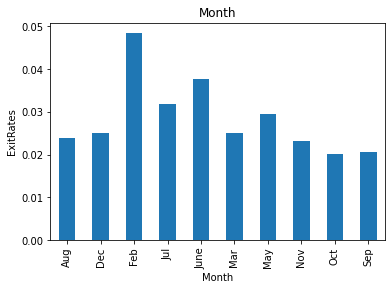

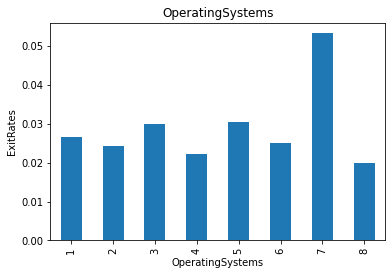

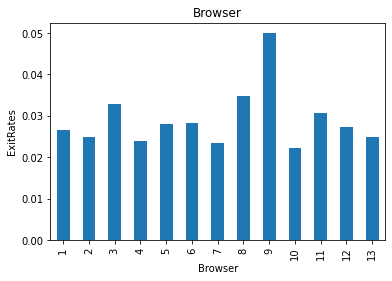

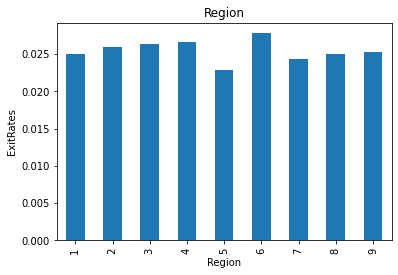

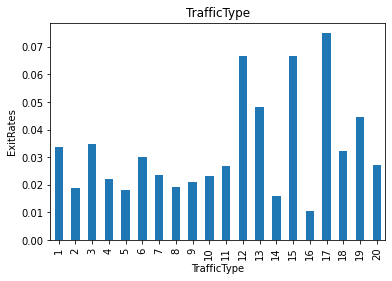

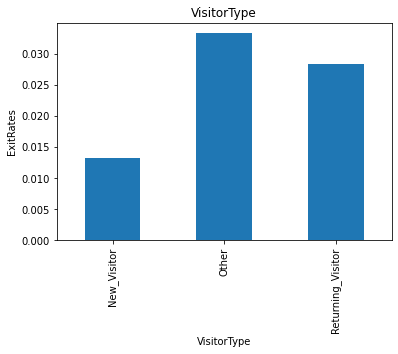

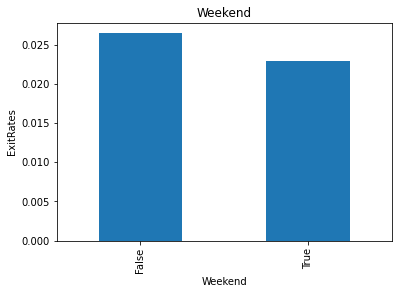

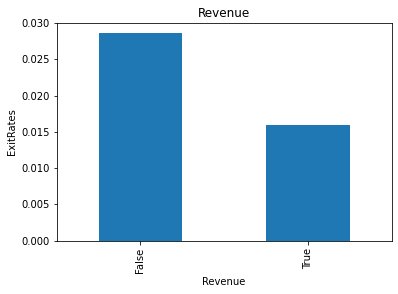

In [134]:
# Let's see the relation of variable BounceRates with other categorical features

import matplotlib.pyplot as plt

categorical_features=['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['ExitRates'].median().plot.bar()    # Taking median because the features contains lots of outliers.
    plt.xlabel(feature)
    plt.ylabel('ExitRates')
    plt.title(feature)
    plt.show()

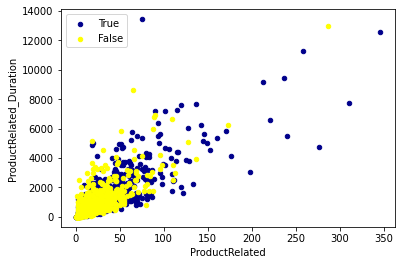

In [144]:
ax = df[df['Revenue'] == 1][0:1000].plot(kind='scatter', x='ProductRelated', y='ProductRelated_Duration', color='DarkBlue', label='True');
df[df['Revenue'] == 0][0:1000].plot(kind='scatter', x='ProductRelated', y='ProductRelated_Duration', color='Yellow', label='False', ax=ax);
plt.show()

Yellow dots represent that the customers did not buy anything and blue dots represent customers buying intention. Both features ProductRelated and ProductRelated_Duration are linearly co-related. Also, as the number of pages or duration spent on Product related pages increases, there are more chances that the customer will buy the product. On the other hand, higher the number of ExitRates and BounceRates lesser is the chance that the customer will purchase. 

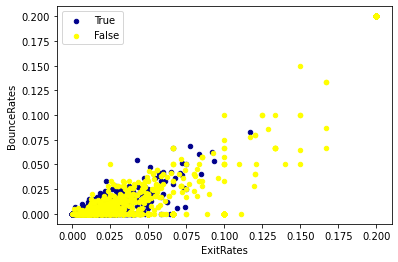

In [159]:
ax = df[df['Revenue'] == 1][0:1000].plot(kind='scatter', x='ExitRates', y='BounceRates', color='DarkBlue', label='True');
df[df['Revenue'] == 0][0:1000].plot(kind='scatter', x='ExitRates', y='BounceRates', color='Yellow', label='False', ax=ax);
plt.show()

# Data Pre-Processing

In [7]:
 # To avoid overfitting, Let us first split the data into test and train.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(               
    df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']], df.Revenue, test_size=0.2, random_state=10)

X_train.shape, X_test.shape

((9864, 17), (2466, 17))

### Creating new variables

As we can see in the key findings, that Administrative is highly related to Administrative_Duration. We can create a new variable: Administrative_Rate which is equal to (Administrative_Duration/Administrative) i.e. Total amount of time (in seconds) spent by the visitor on **per** account management related page. Similarly, we can also create Informational_Rate for Informational and Informational_Duration, and ProductRelated_Rate for ProductRelated_Duration and ProductRelated.

This way we can reduce the dimension of the dataset from 6 to 3 hence diminishing the need for more data.

In [8]:
X_train['Administrative_Rate'] = np.where(X_train['Administrative']!= 0, X_train['Administrative_Duration']/X_train['Administrative'], 0)
X_train['Informational_Rate'] = np.where(X_train['Informational']!= 0, X_train['Informational_Duration']/X_train['Informational'], 0)
X_train['ProductRelated_Rate'] = np.where(X_train['ProductRelated']!= 0, X_train['ProductRelated_Duration']/X_train['ProductRelated'], 0)
X_train.drop(['Administrative',	'Administrative_Duration',	'Informational',	'Informational_Duration',	'ProductRelated',	'ProductRelated_Duration'], axis=1, inplace=True)
X_train.head()

,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Administrative_Rate,Informational_Rate,ProductRelated_Rate
2853,0.000000,0.042222,0.000000,0.4,May,2,2,4,4,Returning_Visitor,False,0.000000,0.0,12.000000
6433,0.083333,0.116667,0.000000,0.0,Nov,2,4,1,3,Returning_Visitor,False,0.000000,0.0,10.345455
4149,0.000000,0.066667,0.000000,0.0,May,2,2,3,6,Returning_Visitor,True,14.500000,0.0,7.500000
9378,0.003883,0.024032,3.179064,0.0,Nov,1,1,3,1,Returning_Visitor,False,11.866667,0.0,37.624646
4040,0.000000,0.025000,0.000000,0.6,May,2,2,3,6,Returning_Visitor,False,0.000000,0.0,75.550000


In [9]:
X_test['Administrative_Rate'] = np.where(X_test['Administrative']!= 0, X_test['Administrative_Duration']/X_test['Administrative'], 0)    # Similarly for test data
X_test['Informational_Rate'] = np.where(X_test['Informational']!= 0, X_test['Informational_Duration']/X_test['Informational'], 0)
X_test['ProductRelated_Rate'] = np.where(X_test['ProductRelated']!= 0, X_test['ProductRelated_Duration']/X_test['ProductRelated'], 0)
X_test.drop(['Administrative',	'Administrative_Duration',	'Informational',	'Informational_Duration',	'ProductRelated',	'ProductRelated_Duration'], axis=1, inplace=True)
X_test.head()

,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Administrative_Rate,Informational_Rate,ProductRelated_Rate
10987,0.004027,0.014462,18.215795,0.0,Dec,2,2,1,6,Returning_Visitor,False,20.409524,170.000000,29.296738
11878,0.016667,0.025000,0.000000,0.0,Nov,1,4,8,8,New_Visitor,True,20.750000,0.000000,26.425000
11127,0.002930,0.025399,0.000000,0.0,Nov,1,2,3,2,Returning_Visitor,False,24.166667,0.000000,20.053889
2486,0.002812,0.012821,8.569134,0.0,May,4,2,6,13,Returning_Visitor,True,14.285714,10.666667,36.737815
392,0.028571,0.029870,0.000000,0.0,Mar,3,2,3,1,Returning_Visitor,True,6.000000,0.000000,39.156122


## Encoding Categorical Features

### Encoding Categorial Feature: Month - by using Target Guided Ordinal Encoding

As we know, there are specific months in which there are more sales (near to Christmas/New Year). Therefore, We need to rank them accordingly. For that, I will use Ordinal Encoding (Target Guided).

We calculate the mean of the target for each label/category, then we order the labels according to these mean from smallest to biggest, and we number them accordingly.

**Advantages**

1. Capture information within the label, therefore rendering more predictive features
2. Create a monotonic relationship between the variable and the target
3. Do not expand the feature space

**Disadvantage**

1. Prone to cause over-fitting

In [10]:
# now we order the labels according to the mean target value

ordered_labels = df.groupby(['Month'])['Revenue'].mean().sort_values().index
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 

X_train['Month_Num'] = X_train.Month.map(ordinal_label)
X_test['Month_Num'] = X_test.Month.map(ordinal_label)

X_train.head()

,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Administrative_Rate,Informational_Rate,ProductRelated_Rate,Month_Num
2853,0.000000,0.042222,0.000000,0.4,May,2,2,4,4,Returning_Visitor,False,0.000000,0.0,12.000000,3
6433,0.083333,0.116667,0.000000,0.0,Nov,2,4,1,3,Returning_Visitor,False,0.000000,0.0,10.345455,9
4149,0.000000,0.066667,0.000000,0.0,May,2,2,3,6,Returning_Visitor,True,14.500000,0.0,7.500000,3
9378,0.003883,0.024032,3.179064,0.0,Nov,1,1,3,1,Returning_Visitor,False,11.866667,0.0,37.624646,9
4040,0.000000,0.025000,0.000000,0.6,May,2,2,3,6,Returning_Visitor,False,0.000000,0.0,75.550000,3


let's inspect the newly created monotonic relationship with the target. First we plot the original variable for comparison, there is no monotonic relationship

Text(0, 0.5, 'Revenue')

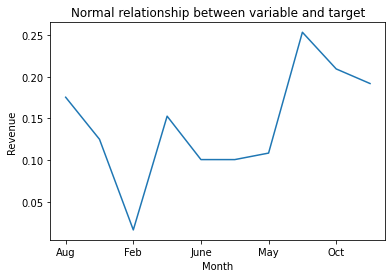

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig = df.groupby(['Month'])['Revenue'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Revenue')

{'Feb': 0, 'Mar': 1, 'June': 2, 'May': 3, 'Dec': 4, 'Jul': 5, 'Aug': 6, 'Sep': 7, 'Oct': 8, 'Nov': 9}


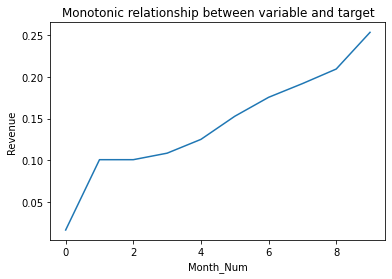

In [ ]:
fig = plt.figure()
df['Month_Num'] = df.Month.map(ordinal_label)
fig = df.groupby(['Month_Num'])['Revenue'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Revenue')
print(ordinal_label)

There is now a monotonic relationship between the variable Month and probability of Revenue. The higher the Month number (corresponding to a particular month), the more likely the visit has been finalized with a transaction.

In [11]:
# Let us drop the Month column from X_train and X_test

X_train.drop(['Month'], axis=1, inplace=True)
X_test.drop(['Month'], axis=1, inplace=True)

### Encoding Categorical Feature: VisitorType - by using One Hot Encoding.
One hot encoding, consists of replacing the categorical variable by 0 or 1, to indicate whether or not a certain category / label of the variable was present for that observation.

In [12]:
X_train = pd.concat([X_train, pd.get_dummies(X_train.VisitorType)],axis=1)
X_train.drop(['VisitorType'], axis=1, inplace=True)
X_train.head()

,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Administrative_Rate,Informational_Rate,ProductRelated_Rate,Month_Num,New_Visitor,Other,Returning_Visitor
2853,0.000000,0.042222,0.000000,0.4,2,2,4,4,False,0.000000,0.0,12.000000,3,0,0,1
6433,0.083333,0.116667,0.000000,0.0,2,4,1,3,False,0.000000,0.0,10.345455,9,0,0,1
4149,0.000000,0.066667,0.000000,0.0,2,2,3,6,True,14.500000,0.0,7.500000,3,0,0,1
9378,0.003883,0.024032,3.179064,0.0,1,1,3,1,False,11.866667,0.0,37.624646,9,0,0,1
4040,0.000000,0.025000,0.000000,0.6,2,2,3,6,False,0.000000,0.0,75.550000,3,0,0,1


In [13]:
X_test = pd.concat([X_test, pd.get_dummies(X_test.VisitorType)],axis=1)
X_test.drop(['VisitorType'], axis=1, inplace=True)
X_test.head()

,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Administrative_Rate,Informational_Rate,ProductRelated_Rate,Month_Num,New_Visitor,Other,Returning_Visitor
10987,0.004027,0.014462,18.215795,0.0,2,2,1,6,False,20.409524,170.000000,29.296738,4,0,0,1
11878,0.016667,0.025000,0.000000,0.0,1,4,8,8,True,20.750000,0.000000,26.425000,9,1,0,0
11127,0.002930,0.025399,0.000000,0.0,1,2,3,2,False,24.166667,0.000000,20.053889,9,0,0,1
2486,0.002812,0.012821,8.569134,0.0,4,2,6,13,True,14.285714,10.666667,36.737815,3,0,0,1
392,0.028571,0.029870,0.000000,0.0,3,2,3,1,True,6.000000,0.000000,39.156122,1,0,0,1


### Converting Bools in Categorical Features: Revenue and Weekend into Integers

In [14]:
X_train[['Weekend']] = X_train[['Weekend']].astype(int)
y_train= y_train.astype(int)

X_test[['Weekend']] = X_test[['Weekend']].astype(int)
y_test = y_test.astype(int)

# Feature Selection

###With Correlation
In this step we will be removing the features which are highly correlated

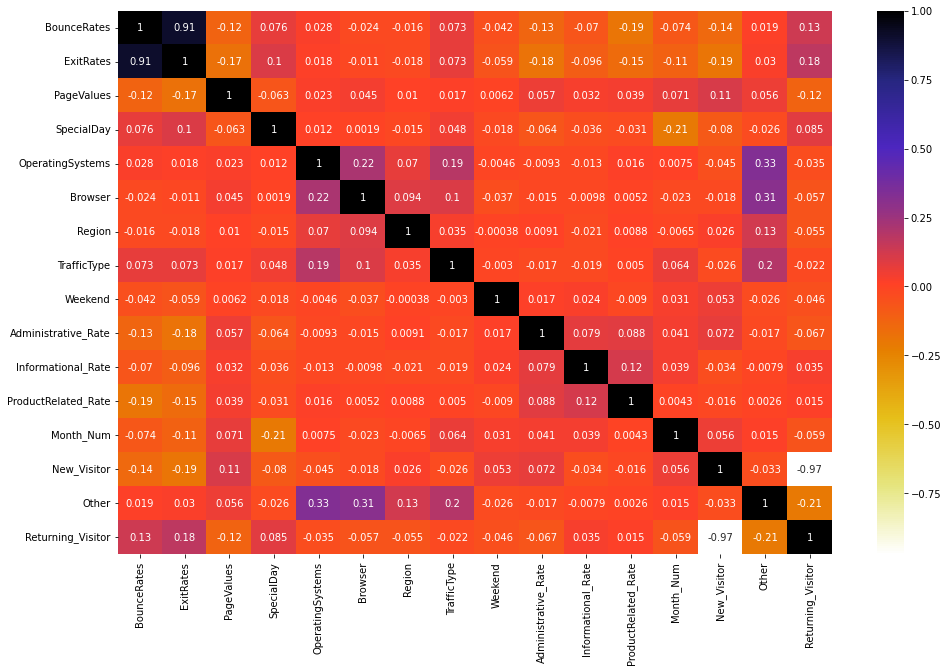

In [ ]:
import seaborn as sns
# Using Pearson Correlation

plt.figure(figsize=(16,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [110]:
 def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [111]:
corr_features = correlation(X_train, 0.85)   # Only features having correlation equal or greater than 0.85 will be selected.
print(len(set(corr_features)))
print(corr_features)

2
{'ExitRates', 'Returning_Visitor'}


As we know from the distributions of ExitRates and BounceRates, Exit rate is more like a normal distribution. So we are going to remove BounceRates. Similarly, Returning_Visitors has more non-zero values than New_Visitor. So we will drop Other

In [16]:
corr_features=['BounceRates','New_Visitor']

In [17]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

### Fisher Score: Chi-square Test For Feature Selection
This score can be used to select the features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies relative to the classes.

 the chi-square test measures dependence between stochastic variables,the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.


In [114]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
f_p_values

(array([2.32430816e+01, 1.41200228e+05, 4.24670659e+01, 2.41193742e-01,
        6.70524957e+00, 3.14990923e+00, 1.73661133e+00, 2.32222243e+00,
        4.62179362e+03, 9.63604890e+03, 8.75232451e+02, 5.17450175e+02,
        1.01910015e+02, 1.62355122e+01]),
 array([1.42763094e-006, 0.00000000e+000, 7.18824639e-011, 6.23345258e-001,
        9.61294750e-003, 7.59311866e-002, 1.87568766e-001, 1.27537692e-001,
        0.00000000e+000, 0.00000000e+000, 2.37723231e-192, 1.51807306e-114,
        5.81020413e-024, 5.59356973e-005]))

In [115]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values.sort_index(ascending=False)

Weekend                 1.275377e-01
TrafficType             1.875688e-01
SpecialDay              7.188246e-11
Returning_Visitor       5.593570e-05
Region                  7.593119e-02
ProductRelated_Rate    2.377232e-192
PageValues              0.000000e+00
OperatingSystems        6.233453e-01
New_Visitor             5.810204e-24
Month_Num              1.518073e-114
Informational_Rate      0.000000e+00
ExitRates               1.427631e-06
Browser                 9.612948e-03
Administrative_Rate     0.000000e+00
dtype: float64

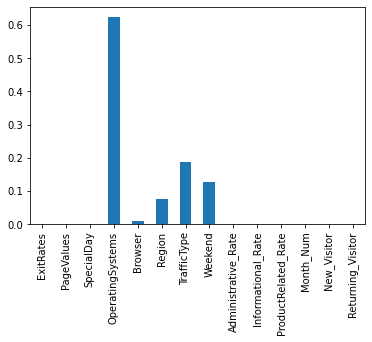

In [116]:
p_values.plot.bar()

OperatingSystems has the highest value for the test chi-squared statistic . Hence, We can drop this column.

In [18]:
X_train.drop(columns=['OperatingSystems'], axis=0, inplace=True)

X_test.drop(columns=['OperatingSystems'], axis=0, inplace=True)

## 3.	Feature Scaling- QuantileTransformer (uniform output)

Both StandardScaler and MinMaxScaler are very sensitive to the presence of outliers. RobustScaler and QuantileTransformer are robust to outliers in the sense that adding or removing outliers in the training set will yield approximately the same transformation. But contrary to RobustScaler, QuantileTransformer will also automatically collapse any outlier by setting them to the a priori defined range boundaries (0 and 1). This can result in saturation artifacts for extreme values.
Avoiding to use QuantileTransformer with Gaussian output because it will less represent the real situation which is not beneficial for business purposes.


In [19]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=10, random_state=0)
X_train_scaled = qt.fit_transform(X_train)

X_Train_Scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [20]:
qt = QuantileTransformer(n_quantiles=10, random_state=0)
X_test_scaled = qt.fit_transform(X_test)

X_Test_Scaled=pd.DataFrame(X_test_scaled,columns=X_train.columns)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


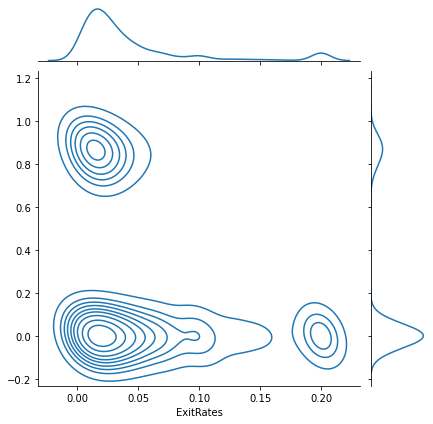

In [166]:
# let's look at how ExitRates transformed  looks like compared to the original variable

import seaborn as sns
sns.jointplot(X_train.ExitRates, X_train_scaled[:,1], kind='kde')

# Sampling- by using SMOTEENN

SMOTE allows to generate samples. However, this method of over-sampling does not have any knowledge regarding the underlying distribution. Therefore, some noisy samples can be generated, e.g. when the different classes cannot be well separated. Hence, it can be beneficial to apply an under-sampling algorithm to clean the noisy samples. Two methods are usually used in the literature: (i) Tomek’s link and (ii) edited nearest neighbours cleaning methods. Imbalanced-learn provides two ready-to-use samplers SMOTETomek and SMOTEENN. In general, SMOTEENN cleans more noisy data than SMOTETomek.

In [21]:
from imblearn.combine import SMOTEENN
from collections import Counter 

sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X_Train_Scaled, y_train)
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({1: 7739, 0: 6594})


In [22]:
from collections import Counter
from imblearn.combine import SMOTETomek 

smt = SMOTEENN(random_state=42)
X_res_test, y_res_test = sme.fit_resample(X_Test_Scaled, y_test)
print('Resampled dataset shape %s' % Counter(y_res_test))

Resampled dataset shape Counter({1: 1920, 0: 1580})


# Model Implementation

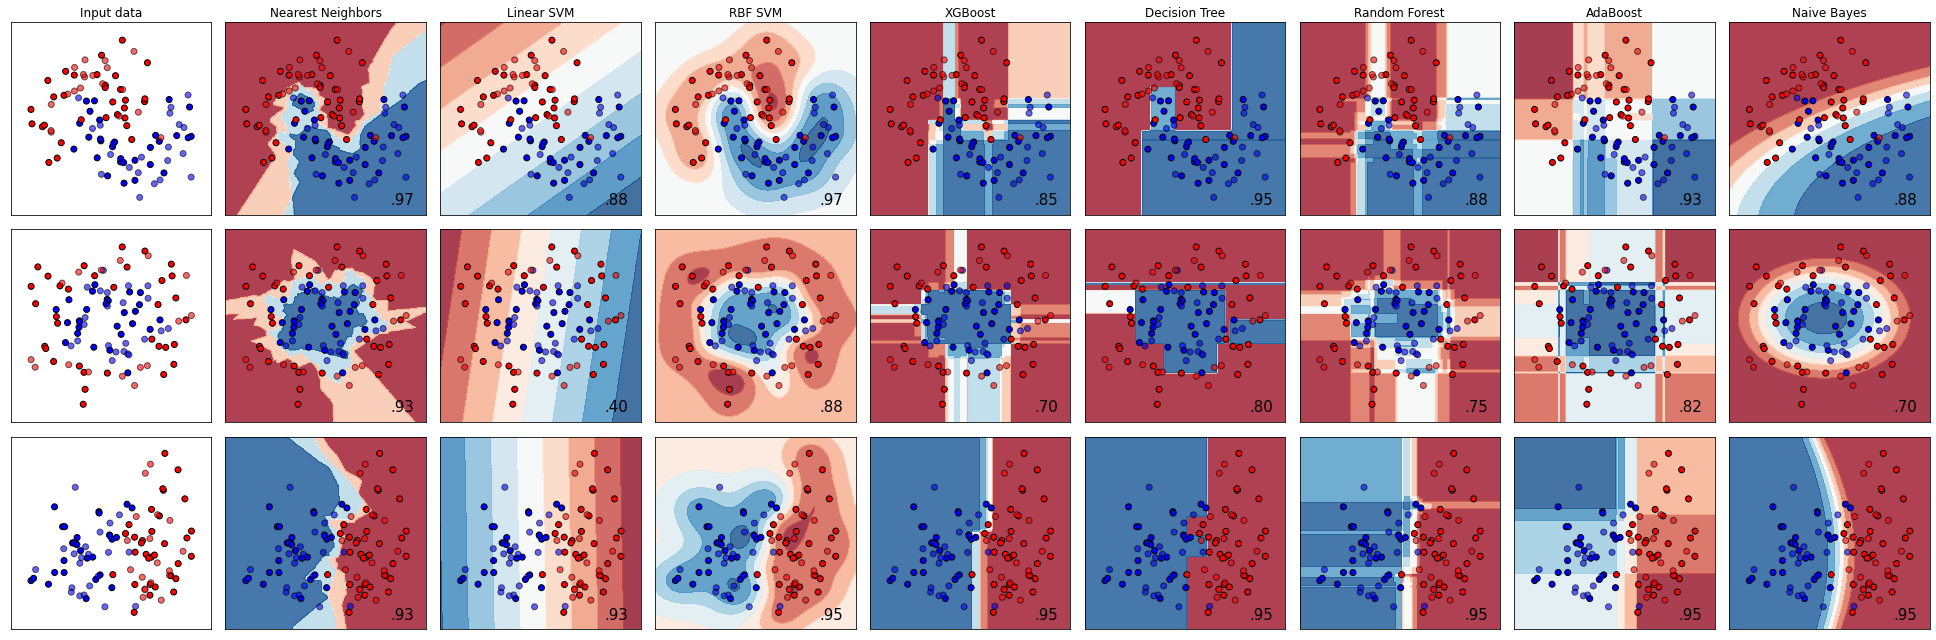

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "XGBoost",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    xgb.XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=1100),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

## XGBoost

In [23]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

xgb_model = xgb.XGBClassifier()

eval_set = [(X_res_test, y_res_test)]
xgb_model.fit(X_res, y_res, eval_metric="auc", eval_set=eval_set, verbose=False)

pred = xgb_model.predict_proba(X_res)
print('xgb train roc-auc: {}'.format(roc_auc_score(y_res, pred[:,1])))
pred = xgb_model.predict_proba(X_res_test)
print('xgb test roc-auc: {}'.format(roc_auc_score(y_res_test, pred[:,1])))

xgb train roc-auc: 0.993723604997013
xgb test roc-auc: 0.988396954113924


##  Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=3)
rf.fit(X_res, y_res)
print('Train set')
pred = rf.predict_proba(X_res)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_res, pred[:,1])))
print('Test set')
pred = rf.predict_proba(X_res_test)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_res_test, pred[:,1])))

Train set
Random Forests roc-auc: 0.973615598419203
Test set
Random Forests roc-auc: 0.9706327465717299


## KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_res,y_res)
pred = knn.predict(X_res_test)

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

print(confusion_matrix(y_res_test,pred))
print(classification_report(y_res_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored

## Hyperparameter optimization for KNN

In [172]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

In [173]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

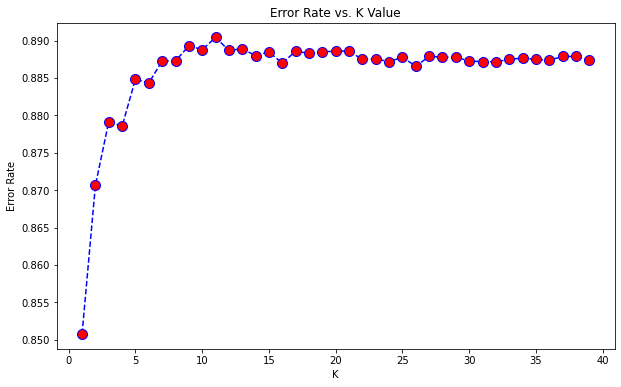

In [174]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [181]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[1907  182]
 [ 203  174]]


              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2089
           1       0.49      0.46      0.47       377

    accuracy                           0.84      2466
   macro avg       0.70      0.69      0.69      2466
weighted avg       0.84      0.84      0.84      2466



In [180]:
# At K=15 the error rate becomes stable
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=14


[[2014   75]
 [ 214  163]]


              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2089
           1       0.68      0.43      0.53       377

    accuracy                           0.88      2466
   macro avg       0.79      0.70      0.73      2466
weighted avg       0.87      0.88      0.87      2466



## Hyperparameter optimization using RandomizedSearchCV

1) XGBoost

In [38]:
# Hyper Parameter Optimization for xgboost


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster
    }

# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator=xgb_model,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=10,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_res,y_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=4,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [39]:
random_cv.best_estimator_

XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=1100)

In [28]:
import xgboost
classifier_xgb=xgboost.XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=1100)

## Hyperparameter optimization using GridSearchCV

2) Random Forest

In [30]:
# Hyper Parameter Optimization for RandomForest

from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X_res, y_res = make_moons()
calibrated_forest = CalibratedClassifierCV(
base_estimator=RandomForestClassifier(n_estimators=10))
param_grid = {
    'base_estimator__max_depth': [2, 4, 6, 8]}
search = GridSearchCV(calibrated_forest, param_grid, cv=5)
search.fit(X_res, y_res)
GridSearchCV(cv=5,
             estimator=CalibratedClassifierCV(...),
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8]})

GridSearchCV(cv=5, estimator=CalibratedClassifierCV(base_estimator=Ellipsis),
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8]})

In [31]:
search.best_estimator_

CalibratedClassifierCV(base_estimator=RandomForestClassifier(max_depth=8,
                                                             n_estimators=10))

In [36]:
classifier_rf=RandomForestClassifier(max_depth=8, n_estimators=10)

## K Fold Cross Validation

In K Fold Cross Validation, we are making 10 splits and for all of them the machine learning model will be applied and mean of accuracy will be given out.

1) XGBoost

In [29]:
from sklearn.model_selection import KFold  # with hyper tuning
model=classifier_xgb
kfold_validation=KFold(10)

import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X_res,y_res,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.9665272  0.9693166  0.97280335 0.9713887  0.95464061 0.94277739
 0.99860433 0.99441731 0.99092812 0.99371947]
0.9755123065498351


2) RandomForest

In [37]:
from sklearn.model_selection import KFold
model=classifier_rf
kfold_validation=KFold(10)

import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X_res,y_res,cv=kfold_validation)
print(results)
print(np.mean(results))

[1.  1.  1.  0.8 0.9 0.9 1.  1.  1.  1. ]
0.96


3) KNN

In [26]:
from sklearn.model_selection import KFold
model=KNeighborsClassifier(n_neighbors=15)
kfold_validation=KFold(10)

import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X_res,y_res,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.92189679 0.90167364 0.92608089 0.93091417 0.94207955 0.97836706
 0.97766923 0.97278437 0.98046057 0.97278437]
0.9504710641085159


# Result analysis and discussion

###Feature importance in Random forest

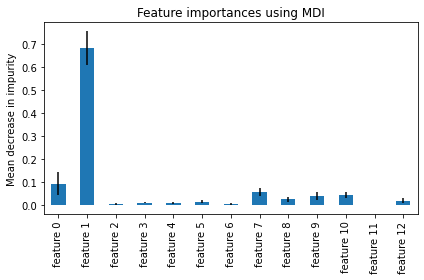

In [42]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = classifier_rf
forest.fit(X_train, y_train)

importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [50]:
X_train.columns[12]

'Returning_Visitor'

PageValues has the highest importance in Random Forest classifier. ProductRelated_Rate,Informational_Rate,Administrative_Rate, Month_Num, and ExitRates are other significantly important features.